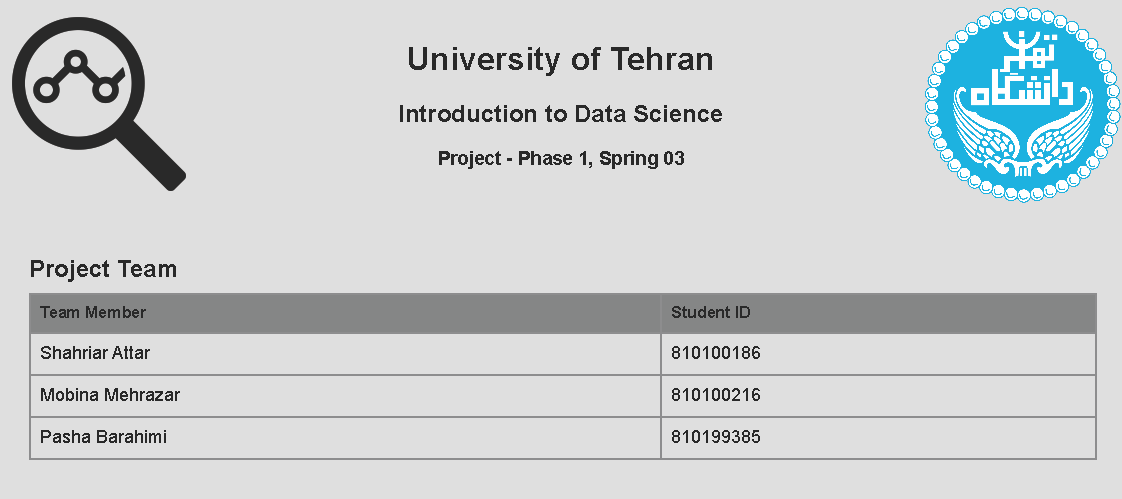

# <a id='toc1_'></a>[Project - Phase 1 - Data Cleaning](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Project - Phase 1 - Data Cleaning](#toc1_)    
  - [Introduction](#toc1_1_)    
  - [Objectives](#toc1_2_)    
  - [Tasks](#toc1_3_)    
  - [Dataset Description](#toc1_4_)    
  - [Environment Setup](#toc1_5_)    
  - [Steps](#toc1_6_)    
    - [Data Cleaning](#toc1_6_1_)    
      - [Load the Data](#toc1_6_1_1_)    
      - [Dataset Summary](#toc1_6_1_2_)    
      - [Removing Duplicates](#toc1_6_1_3_)    
      - [Handling Missing Values](#toc1_6_1_4_)    
        - [Electric Cars](#toc1_6_1_4_1_)    
        - [Rows with Missing Values](#toc1_6_1_4_2_)    
        - [Columns with Many Missing Values](#toc1_6_1_4_3_)    
        - [Finance Price](#toc1_6_1_4_4_)    
        - [Colour](#toc1_6_1_4_5_)    
        - [Gears](#toc1_6_1_4_6_)    
        - [No of Doors](#toc1_6_1_4_7_)    
      - [Unnecessary Columns](#toc1_6_1_5_)    
      - [Fixing Value Formats and Types](#toc1_6_1_6_)    
        - [Kilowatts](#toc1_6_1_6_1_)    
        - [Finance Price](#toc1_6_1_6_2_)    
        - [Mileage](#toc1_6_1_6_3_)    
        - [Fuel Consumption](#toc1_6_1_6_4_)    
        - [Fuel Tank Capacity](#toc1_6_1_6_5_)    
        - [Price](#toc1_6_1_6_6_)    
        - [Engine Capacity](#toc1_6_1_6_7_)    
        - [Gears](#toc1_6_1_6_8_)    
        - [No of Seats, No of Doors](#toc1_6_1_6_9_)    
        - [Spare Key](#toc1_6_1_6_10_)    
        - [Category](#toc1_6_1_6_11_)    
        - [Dekra](#toc1_6_1_6_12_)    
        - [Drive](#toc1_6_1_6_13_)    
      - [Column Reordering](#toc1_6_1_7_)    
      - [Save the Cleaned Data](#toc1_6_1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introduction](#toc0_)

The dataset contains information about car features and their selling price in South Africa. The objective is to predict the selling price of the cars based on the features provided.

## <a id='toc1_2_'></a>[Objectives](#toc0_)

The purpose of this phase is as follows:

1. To clean the data and handle missing values.

## <a id='toc1_3_'></a>[Tasks](#toc0_)

- Data Cleaning

## <a id='toc1_4_'></a>[Dataset Description](#toc0_)

The dataset consists of the following columns:

- `id`: The unique identifier for a car in the dataset.
- `Make`: The brand of the car.
- `Model`: The model of the car.
- `Features`: The extra features of the car.
- `Kilowatts`: The power of the car in kilowatts.
- `Cylinder Layout`: The number of cylinders and thei layout.
- `Finance Price`: The price of the car if financed per month.
- `Mileage`: The number of miles the car has been driven.
- `Gears`: The number of gears in the car.
- `Fuel Type`: The type of fuel the car uses (e.g. Petrol, Diesel, Electric).
- `No of Seats`: The number of seats in the car.
- `Registration Year`: The year the car was registered.
- `Colour`: The colour of the car.
- `No of Doors`: The number of doors in the car.
- `Spare Key`: Whether the car has a spare key or not.
- `Fuel Consumption`: The fuel consumption of the car.
- `Dekra`: The Dekra condition report of the car. Dekra is a vehicle inspection company.
- `Variant`: The variant of the car.
- `Drive`: The car drive type (e.g. Front Wheel Drive, Rear Wheel Drive, Four Wheel Drive).
- `Body Type`: The body type of the car.
- `Vehicle Service History`: The service history of the car.
- `Maintenance Plan`: The maintenance plan data of the car (if any).
- `Fuel Tank`: The fuel tank capacity of the car.
- `Parking bay number`: The parking bay number of the car.
- `Category`: The category of the car. This shows the working condition of the car. 'A' means the car is in good condition and is newer, while 'B' means the car is a bit older and may not be in the best condition.
- `NaTIS Vehicle status`: The NaTIS (National Administration Traffic Information System) status of the car. This document is the car's birth certificate and contains all the information about the car.
- `Engine Capacity`: The engine capacity of the car.
- `Branch`: The branch where the car is located.
- `Warranty`: The warranty of the car (if any).
- `Transmission`: The transmission type of the car (e.g. Manual, Automatic).
- `Price`: The selling price of the car.

## <a id='toc1_5_'></a>[Environment Setup](#toc0_)

We'll begin by setting up your Python environment and installing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from ydata_profiling import ProfileReport

from typing import Optional
import re

In [2]:
DATA_PATH = "../data/cars.csv"
CLEANED_DATA_PATH = "../data/cars_cleaned.csv"
PROCESSED_DATA_PATH = "../data/cars_processed.csv"

MAKE_MODELS_PATH = "../data/make_models/{make}_models.txt"

## <a id='toc1_6_'></a>[Steps](#toc0_)

### <a id='toc1_6_1_'></a>[Data Cleaning](#toc0_)

#### <a id='toc1_6_1_1_'></a>[Load the Data](#toc0_)

In [3]:
df = pd.read_csv(DATA_PATH)

#### <a id='toc1_6_1_2_'></a>[Dataset Summary](#toc0_)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 8080 non-null   object 
 1   Kilowatts                7970 non-null   object 
 2   Cylinder Layout          7963 non-null   object 
 3   Finance Price            6608 non-null   object 
 4   Mileage                  8080 non-null   object 
 5   Gears                    7901 non-null   float64
 6   Fuel Type                7985 non-null   object 
 7   No of Seats              7976 non-null   float64
 8   Registration Year        8080 non-null   int64  
 9   Colour                   8080 non-null   object 
 10  No of Doors              7976 non-null   float64
 11  Spare Key                8080 non-null   object 
 12  Fuel Consumption         7571 non-null   object 
 13  Dekra                    8080 non-null   object 
 14  Variant                 

As we can see, the dataset contains 31 columns and 8080 rows. The columns are describe in [Dataset Description](#dataset-description).

In [5]:
df.head()

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Parking bay number,Category,Price,Make,NaTIS Vehicle status,Engine Capacity,Branch,Warranty,Model,Transmission
0,"['Reverse camera', 'Auto stop-start']",250 kW,V6,R 22 416 p/m,72 500km,8.0,Petrol,4.0,2020,Silver,...,NaN,A,R 1 212 900,Porsche,NaN,2998 cc,Midstream (GP),NaN,Cayenne Coupe,Automatic
1,"['CarPlay or Android Auto', 'Reverse camera', ...",NaN,NaN,R 22 326 p/m,3 500km,NaN,Electric,5.0,2023,White,...,NaN,A,R 1 207 900,Jaguar,NaN,NaN,Midstream (GP),2031/02/15,I-Pace,Automatic
2,"['CarPlay or Android Auto', 'Reverse camera', ...",177 kW,I4,R 21 416 p/m,41 500km,8.0,Diesel,7.0,2020,Black,...,NaN,A,R 1 157 900,Land Rover,NaN,1997 cc,JHB South (GP),NaN,Defender 110,Automatic
3,"['CarPlay or Android Auto', 'Reverse camera']",257 kW,I6,R 43 148 p/m,31 000km,8.0,Diesel,5.0,2023,Black,...,NaN,A,R 2 352 900,Land Rover,NaN,2997 cc,Dome (GP),2028/01/05,Range Rover Sport,Automatic
4,[],375 kW,V8,NaN,73 482km,7.0,Petrol,2.0,2015,Yellow,...,NaN,A,R 1 152 000,Mercedes-Benz,NaN,3982 cc,Richmond (WC),NaN,AMG GT,Automatic


#### <a id='toc1_6_1_3_'></a>[Removing Duplicates](#toc0_)

During the scraping process, we might have scraped the same data multiple times. Let's check for duplicates and remove them.

In [6]:
duplicate_count = df["id"].duplicated().sum()
print(f"Duplicate count: {duplicate_count}")

Duplicate count: 1294


In [7]:
df.drop_duplicates(subset="id", keep="first", inplace=True)

#### <a id='toc1_6_1_4_'></a>[Handling Missing Values](#toc0_)

Let's check for missing values in the dataset and handle them accordingly.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6786 entries, 0 to 8079
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6786 non-null   object 
 1   Kilowatts                6701 non-null   object 
 2   Cylinder Layout          6694 non-null   object 
 3   Finance Price            5623 non-null   object 
 4   Mileage                  6786 non-null   object 
 5   Gears                    6634 non-null   float64
 6   Fuel Type                6716 non-null   object 
 7   No of Seats              6707 non-null   float64
 8   Registration Year        6786 non-null   int64  
 9   Colour                   6786 non-null   object 
 10  No of Doors              6707 non-null   float64
 11  Spare Key                6786 non-null   object 
 12  Fuel Consumption         6377 non-null   object 
 13  Dekra                    6786 non-null   object 
 14  Variant                  6786

##### <a id='toc1_6_1_4_1_'></a>[Electric Cars](#toc0_)

In [9]:
df_electric = df[df["Fuel Type"] == "Electric"]
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1 to 2083
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 13 non-null     object 
 1   Kilowatts                8 non-null      object 
 2   Cylinder Layout          0 non-null      object 
 3   Finance Price            11 non-null     object 
 4   Mileage                  13 non-null     object 
 5   Gears                    9 non-null      float64
 6   Fuel Type                13 non-null     object 
 7   No of Seats              13 non-null     float64
 8   Registration Year        13 non-null     int64  
 9   Colour                   13 non-null     object 
 10  No of Doors              13 non-null     float64
 11  Spare Key                13 non-null     object 
 12  Fuel Consumption         3 non-null      object 
 13  Dekra                    13 non-null     object 
 14  Variant                  13 non

In [10]:
df_electric.head()

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Parking bay number,Category,Price,Make,NaTIS Vehicle status,Engine Capacity,Branch,Warranty,Model,Transmission
1,"['CarPlay or Android Auto', 'Reverse camera', ...",NaN,NaN,R 22 326 p/m,3 500km,NaN,Electric,5.0,2023,White,...,NaN,A,R 1 207 900,Jaguar,NaN,NaN,Midstream (GP),2031/02/15,I-Pace,Automatic
17,"['CarPlay or Android Auto', 'Reverse camera', ...",440 kW,NaN,NaN,28 537km,2.0,Electric,5.0,2022,Red,...,NaN,A,R 1 671 000,Audi,NaN,NaN,Midstream (GP),2027/02/10,e-TRON,Automatic
18,"['CarPlay or Android Auto', 'Reverse camera', ...",210 kW,NaN,R 18 143 p/m,27 000km,NaN,Electric,5.0,2022,Blue,...,MID H088,A,R 977 900,BMW,NaN,NaN,Midstream (GP),2027/08/03,iX3,Automatic
39,[],350 kW,NaN,R 26 326 p/m,12 536km,2.0,Electric,5.0,2022,Blue,...,NaN,A,R 1 427 900,Audi,NaN,NaN,Midstream (GP),NaN,e-TRON,Automatic
76,"['CarPlay or Android Auto', 'Reverse camera', ...",210 kW,NaN,R 17 470 p/m,11 000km,NaN,Electric,5.0,2022,Grey,...,MID H087,A,R 940 900,BMW,NaN,NaN,Midstream (GP),2027/09/19,iX3,Automatic


As we can see, we only have 13 electric cars in the dataset and they contain a lot of missing values. Let's remove the electric cars from the dataset.

In [11]:
df = df[df["Fuel Type"] != "Electric"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6773 entries, 0 to 8079
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6773 non-null   object 
 1   Kilowatts                6693 non-null   object 
 2   Cylinder Layout          6694 non-null   object 
 3   Finance Price            5612 non-null   object 
 4   Mileage                  6773 non-null   object 
 5   Gears                    6625 non-null   float64
 6   Fuel Type                6703 non-null   object 
 7   No of Seats              6694 non-null   float64
 8   Registration Year        6773 non-null   int64  
 9   Colour                   6773 non-null   object 
 10  No of Doors              6694 non-null   float64
 11  Spare Key                6773 non-null   object 
 12  Fuel Consumption         6374 non-null   object 
 13  Dekra                    6773 non-null   object 
 14  Variant                  6773

##### <a id='toc1_6_1_4_2_'></a>[Rows with Missing Values](#toc0_)

For some columns, we have a small number of missing values. Let's remove the rows with missing values for these columns.

In [13]:
cols = ["Kilowatts", "Cylinder Layout", "Gears", "Fuel Type", "No of Seats", "No of Doors", "Fuel Consumption", "Drive", "Body Type", "Fuel Tank Capacity", "Engine Capacity", "Transmission"]
df = df.dropna(subset=cols)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 2 to 8077
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6156 non-null   object 
 1   Kilowatts                6156 non-null   object 
 2   Cylinder Layout          6156 non-null   object 
 3   Finance Price            5112 non-null   object 
 4   Mileage                  6156 non-null   object 
 5   Gears                    6156 non-null   float64
 6   Fuel Type                6156 non-null   object 
 7   No of Seats              6156 non-null   float64
 8   Registration Year        6156 non-null   int64  
 9   Colour                   6156 non-null   object 
 10  No of Doors              6156 non-null   float64
 11  Spare Key                6156 non-null   object 
 12  Fuel Consumption         6156 non-null   object 
 13  Dekra                    6156 non-null   object 
 14  Variant                  6156

##### <a id='toc1_6_1_4_3_'></a>[Columns with Many Missing Values](#toc0_)

For some columns, we have a large number of missing values. Let's remove these columns from the dataset. For the `Maintenance plan` and `Warranty` columns, we'll replace the missing values with `No`.

In [15]:
cols = ["Parking bay number", "NaTIS Vehicle status"]
df = df.drop(cols, axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 2 to 8077
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6156 non-null   object 
 1   Kilowatts                6156 non-null   object 
 2   Cylinder Layout          6156 non-null   object 
 3   Finance Price            5112 non-null   object 
 4   Mileage                  6156 non-null   object 
 5   Gears                    6156 non-null   float64
 6   Fuel Type                6156 non-null   object 
 7   No of Seats              6156 non-null   float64
 8   Registration Year        6156 non-null   int64  
 9   Colour                   6156 non-null   object 
 10  No of Doors              6156 non-null   float64
 11  Spare Key                6156 non-null   object 
 12  Fuel Consumption         6156 non-null   object 
 13  Dekra                    6156 non-null   object 
 14  Variant                  6156

In [17]:
df["Maintenance plan"] = df["Maintenance plan"].fillna("No")
df["Warranty"] = df["Warranty"].fillna("No")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 2 to 8077
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6156 non-null   object 
 1   Kilowatts                6156 non-null   object 
 2   Cylinder Layout          6156 non-null   object 
 3   Finance Price            5112 non-null   object 
 4   Mileage                  6156 non-null   object 
 5   Gears                    6156 non-null   float64
 6   Fuel Type                6156 non-null   object 
 7   No of Seats              6156 non-null   float64
 8   Registration Year        6156 non-null   int64  
 9   Colour                   6156 non-null   object 
 10  No of Doors              6156 non-null   float64
 11  Spare Key                6156 non-null   object 
 12  Fuel Consumption         6156 non-null   object 
 13  Dekra                    6156 non-null   object 
 14  Variant                  6156

##### <a id='toc1_6_1_4_4_'></a>[Finance Price](#toc0_)

For the `Finance Price` column, we'll impute the missing values, after fixing the data type. For now, let's replace the missing values with 'N/A'.

In [19]:
df["Finance Price"] = df["Finance Price"].fillna("N/A")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 2 to 8077
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6156 non-null   object 
 1   Kilowatts                6156 non-null   object 
 2   Cylinder Layout          6156 non-null   object 
 3   Finance Price            6156 non-null   object 
 4   Mileage                  6156 non-null   object 
 5   Gears                    6156 non-null   float64
 6   Fuel Type                6156 non-null   object 
 7   No of Seats              6156 non-null   float64
 8   Registration Year        6156 non-null   int64  
 9   Colour                   6156 non-null   object 
 10  No of Doors              6156 non-null   float64
 11  Spare Key                6156 non-null   object 
 12  Fuel Consumption         6156 non-null   object 
 13  Dekra                    6156 non-null   object 
 14  Variant                  6156

##### <a id='toc1_6_1_4_5_'></a>[Colour](#toc0_)

In [21]:
df_undefined_colour = df[df["Colour"] == "Undefined"]
df_undefined_colour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 13 to 6615
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 53 non-null     object 
 1   Kilowatts                53 non-null     object 
 2   Cylinder Layout          53 non-null     object 
 3   Finance Price            53 non-null     object 
 4   Mileage                  53 non-null     object 
 5   Gears                    53 non-null     float64
 6   Fuel Type                53 non-null     object 
 7   No of Seats              53 non-null     float64
 8   Registration Year        53 non-null     int64  
 9   Colour                   53 non-null     object 
 10  No of Doors              53 non-null     float64
 11  Spare Key                53 non-null     object 
 12  Fuel Consumption         53 non-null     object 
 13  Dekra                    53 non-null     object 
 14  Variant                  53 no

In [22]:
df = df[df["Colour"] != "Undefined"]

##### <a id='toc1_6_1_4_6_'></a>[Gears](#toc0_)

In [23]:
df[df["Gears"] == 0]

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Branch,Warranty,Model,Transmission
5425,['Auto stop-start'],57 kW,I4,R 2 305 p/m,127 000km,0.0,Hybrid,5.0,2008,Silver,...,No,45 l,B,R 107 000,Toyota,1497 cc,Dome (GP),No,Prius,Automatic
7106,[],165 kW,V6,R 1 212 p/m,163 000km,0.0,Petrol,5.0,2003,Silver,...,No,80 l,B,R 50 900,Mercedes-Benz,3199 cc,Gqeberha (EC),No,E Class Sedan,Automatic
7298,[],165 kW,V6,R 1 539 p/m,148 826km,0.0,Petrol,5.0,2002,Silver,...,No,80 l,B,R 69 900,Mercedes-Benz,3199 cc,Dome (GP),No,E Class Sedan,Automatic


In [24]:
df = df[df["Gears"] != 0]

##### <a id='toc1_6_1_4_7_'></a>[No of Doors](#toc0_)

In [25]:
df[df["No of Doors"] == 0]

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Branch,Warranty,Model,Transmission
5452,[],126 kW,I4,R 2 449 p/m,335 500km,5.0,Petrol,3.0,2010,White,...,No,75 l,B,R 119 900,Hyundai,2359 cc,Richmond (WC),No,H-1,Manual


In [26]:
df = df[df["No of Doors"] != 0]

#### <a id='toc1_6_1_5_'></a>[Unnecessary Columns](#toc0_)

Some columns are not useful for our analysis. Let's remove these columns from the dataset.

In [27]:
df = df.drop("id", axis=1)
df = df.drop("Branch", axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6099 entries, 2 to 8077
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6099 non-null   object 
 1   Kilowatts                6099 non-null   object 
 2   Cylinder Layout          6099 non-null   object 
 3   Finance Price            6099 non-null   object 
 4   Mileage                  6099 non-null   object 
 5   Gears                    6099 non-null   float64
 6   Fuel Type                6099 non-null   object 
 7   No of Seats              6099 non-null   float64
 8   Registration Year        6099 non-null   int64  
 9   Colour                   6099 non-null   object 
 10  No of Doors              6099 non-null   float64
 11  Spare Key                6099 non-null   object 
 12  Fuel Consumption         6099 non-null   object 
 13  Dekra                    6099 non-null   object 
 14  Variant                  6099

In [29]:
df.value_counts("Variant")

Variant
2.4gd-6 R/B Auto                    38
2.8gd-6 R/B Auto                    36
320i Auto (F30)                     34
4 3.0 Td/sd V6 SE                   34
1.0 EcoBoost Titanium               33
                                    ..
500 2.2d Mhawk Auto (W8) 7 Seat      1
500 2.2d Mhawk Auto (W10) 7 Seat     1
500 2.2d Mhawk (W8) 7 Seat AWD       1
500 2.2d Mhawk (W4) 7 Seat           1
xDrive50i M-Sport Auto               1
Name: count, Length: 2226, dtype: int64

The `Variant` column is not useful for our analysis as it contains a lot of unique values. Let's remove this column.

In [30]:
df = df.drop("Variant", axis=1)

#### <a id='toc1_6_1_6_'></a>[Fixing Value Formats and Types](#toc0_)

Some values in the dataset are not in the correct format. For example, the `Kilowatts` column should be an integer, but it is currently a string ending with 'kW'. Let's fix these value formats.

##### <a id='toc1_6_1_6_1_'></a>[Kilowatts](#toc0_)

In [31]:
def find_rows_with_invalid_format(df: pd.DataFrame, column: str, regex: str) -> pd.DataFrame:
    return df[~df[column].str.match(regex, na=False)]

In [32]:
def to_numeric(df: pd.DataFrame, column: str, ignore: Optional[str] = None) -> pd.DataFrame:
    new_df = df.copy()
    new_df[column] = new_df[column].apply(lambda x: re.sub(r"[^\d\.]", "", x) if x != ignore else x)
    new_df[column] = pd.to_numeric(new_df[column], errors="coerce")
    return new_df

In [33]:
regex_kilowatts = r"\d{1,3} kW"
invalid_kilowatts = find_rows_with_invalid_format(df, "Kilowatts", regex_kilowatts)
invalid_kilowatts

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [34]:
df = to_numeric(df, "Kilowatts")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6099 entries, 2 to 8077
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6099 non-null   object 
 1   Kilowatts                6099 non-null   int64  
 2   Cylinder Layout          6099 non-null   object 
 3   Finance Price            6099 non-null   object 
 4   Mileage                  6099 non-null   object 
 5   Gears                    6099 non-null   float64
 6   Fuel Type                6099 non-null   object 
 7   No of Seats              6099 non-null   float64
 8   Registration Year        6099 non-null   int64  
 9   Colour                   6099 non-null   object 
 10  No of Doors              6099 non-null   float64
 11  Spare Key                6099 non-null   object 
 12  Fuel Consumption         6099 non-null   object 
 13  Dekra                    6099 non-null   object 
 14  Drive                    6099

##### <a id='toc1_6_1_6_2_'></a>[Finance Price](#toc0_)

In [36]:
regex_finance_price = r"R \d{1,3} ?\d{1,3}?  p/m"
invalid_finance_price = find_rows_with_invalid_format(df, "Finance Price", regex_finance_price)
invalid_finance_price[invalid_finance_price["Finance Price"] != "N/A"]

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [37]:
df = to_numeric(df, "Finance Price", "N/A")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6099 entries, 2 to 8077
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6099 non-null   object 
 1   Kilowatts                6099 non-null   int64  
 2   Cylinder Layout          6099 non-null   object 
 3   Finance Price            5065 non-null   float64
 4   Mileage                  6099 non-null   object 
 5   Gears                    6099 non-null   float64
 6   Fuel Type                6099 non-null   object 
 7   No of Seats              6099 non-null   float64
 8   Registration Year        6099 non-null   int64  
 9   Colour                   6099 non-null   object 
 10  No of Doors              6099 non-null   float64
 11  Spare Key                6099 non-null   object 
 12  Fuel Consumption         6099 non-null   object 
 13  Dekra                    6099 non-null   object 
 14  Drive                    6099

Let's also impute the missing values in the `Finance Price` column using KNN imputation.

In [39]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df.select_dtypes(include=np.number))
df_imputed = pd.DataFrame(imputed_data, columns=df.select_dtypes(include=np.number).columns)

df.reset_index(drop=True, inplace=True)
df["Finance Price"] = df_imputed["Finance Price"]

We can also convert the `Finance Price` column to an integer.

In [40]:
df["Finance Price"] = df["Finance Price"].apply(lambda x: int(x))

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6099 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6099 non-null   object 
 1   Kilowatts                6099 non-null   int64  
 2   Cylinder Layout          6099 non-null   object 
 3   Finance Price            6099 non-null   int64  
 4   Mileage                  6099 non-null   object 
 5   Gears                    6099 non-null   float64
 6   Fuel Type                6099 non-null   object 
 7   No of Seats              6099 non-null   float64
 8   Registration Year        6099 non-null   int64  
 9   Colour                   6099 non-null   object 
 10  No of Doors              6099 non-null   float64
 11  Spare Key                6099 non-null   object 
 12  Fuel Consumption         6099 non-null   object 
 13  Dekra                    6099 non-null   object 
 14  Drive                   

##### <a id='toc1_6_1_6_3_'></a>[Mileage](#toc0_)

In [42]:
regex_mileage = r"\d{1,3}?\xa0?\d{1,3}km"
invalid_mileage = find_rows_with_invalid_format(df, "Mileage", regex_mileage)
invalid_mileage

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission
2531,['Reverse camera'],180,V6,4304,km,6.0,Diesel,7.0,2013,White,...,Complete but Due,No,82 l,B,R 216 900,Land Rover,2993 cc,No,Discovery,Automatic
2659,[],120,I4,4394,km,4.0,Diesel,7.0,2012,White,...,"Complete, Up To Date",No,80 l,A,R 221 900,Toyota,2982 cc,No,Fortuner Epic,Automatic
3782,[],130,I4,3267,km,5.0,Diesel,4.0,2009,Black,...,Partial but Up to Date,No,80 l,B,R 159 900,Jeep,2777 cc,No,Wrangler,Automatic
4475,[],120,I4,6835,km,6.0,Diesel,7.0,2014,Grey,...,Partial but Up to Date,No,75 l,B,R 110 000,Chrysler,2777 cc,No,Grand Voyager,Automatic
4683,[],200,V6,2212,km,7.0,Petrol,2.0,2005,Silver,...,No record,No,70 l,B,R 101 900,Mercedes-Benz,3498 cc,No,SLK Class,Automatic
5101,['Reverse camera'],125,I4,1848,km,5.0,Petrol,5.0,2012,Grey,...,No record,No,51 l,B,R 81 900,Jeep,2359 cc,No,Patriot,Manual
5979,[],169,V6,1397,km,5.0,Petrol,7.0,2007,Black,...,No record,No,65 l,B,R 52 000,Chevrolet,3195 cc,No,Captiva,Automatic


In [43]:
df = df.drop(invalid_mileage.index)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   object 
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   object 
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

In [45]:
df = to_numeric(df, "Mileage")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   object 
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### <a id='toc1_6_1_6_4_'></a>[Fuel Consumption](#toc0_)

In [47]:
regex_fuel_consumption = r"\d{1,2}(\.\d{1,2})? l/100km"
invalid_fuel_consumption = find_rows_with_invalid_format(df, "Fuel Consumption", regex_fuel_consumption)
invalid_fuel_consumption

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [48]:
df["Fuel Consumption"] = df["Fuel Consumption"].apply(lambda x: x[:-7])

In [49]:
df.head()["Fuel Consumption"]

0    7.65 
1     7.4 
2     9.4 
3    10.2 
4    7.65 
Name: Fuel Consumption, dtype: object

In [50]:
df = to_numeric(df, "Fuel Consumption")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### <a id='toc1_6_1_6_5_'></a>[Fuel Tank Capacity](#toc0_)

In [52]:
regex_fuel_tank_capacity = r"\d{1,3} l"
invalid_fuel_tank_capacity = find_rows_with_invalid_format(df, "Fuel Tank Capacity", regex_fuel_tank_capacity)
invalid_fuel_tank_capacity

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [53]:
df = to_numeric(df, "Fuel Tank Capacity")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### <a id='toc1_6_1_6_6_'></a>[Price](#toc0_)

In [55]:
regex_price = r"R (\d{1,3} )?(\d{1,3} )?\d{1,3}"
invalid_price = find_rows_with_invalid_format(df, "Price", regex_price)
invalid_price

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [56]:
df = to_numeric(df, "Price")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### <a id='toc1_6_1_6_7_'></a>[Engine Capacity](#toc0_)

In [58]:
regex_engine_capacity = r"\d{3,4} cc"
invalid_engine_capacity = find_rows_with_invalid_format(df, "Engine Capacity", regex_engine_capacity)
invalid_engine_capacity

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [59]:
df = to_numeric(df, "Engine Capacity")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### <a id='toc1_6_1_6_8_'></a>[Gears](#toc0_)

In [61]:
df["Gears"] = df["Gears"].apply(lambda x: int(x))

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   int64  
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### <a id='toc1_6_1_6_9_'></a>[No of Seats, No of Doors](#toc0_)

In [63]:
df["No of Seats"] = df["No of Seats"].apply(lambda x: int(x))
df["No of Doors"] = df["No of Doors"].apply(lambda x: int(x))

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   int64  
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   int64  
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   int64  
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### <a id='toc1_6_1_6_10_'></a>[Spare Key](#toc0_)

In [65]:
df.value_counts("Spare Key")

Spare Key
Yes    3920
 No    2172
Name: count, dtype: int64

In [66]:
df["Spare Key"] = df["Spare Key"].apply(lambda x: x == "Yes")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   int64  
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   int64  
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   int64  
 11  Spare Key                6092 non-null   bool   
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### <a id='toc1_6_1_6_11_'></a>[Category](#toc0_)

In [68]:
df["Category"] = df["Category"].apply(lambda x: x.strip())

##### <a id='toc1_6_1_6_12_'></a>[Dekra](#toc0_)

In [69]:
df.value_counts("Dekra")

Dekra
Dekra Green       3558
Dekra Platinum    1623
Dekra Gold         911
Name: count, dtype: int64

In [70]:
df["Dekra"] = df["Dekra"].apply(lambda x: x[6:])
df.head()["Dekra"]

0    Platinum
1    Platinum
2        Gold
3        Gold
4    Platinum
Name: Dekra, dtype: object

##### <a id='toc1_6_1_6_13_'></a>[Drive](#toc0_)

In [71]:
df.value_counts("Drive")

Drive
F      3323
FR     1597
R      1152
F/R      20
Name: count, dtype: int64

In [72]:
df["Drive"] = df["Drive"].apply(lambda x: x.replace("/", ""))
df.value_counts("Drive")

Drive
F     3323
FR    1617
R     1152
Name: count, dtype: int64

#### <a id='toc1_6_1_7_'></a>[Column Reordering](#toc0_)

Let's reorder the columns in the dataset for better readability.

In [73]:
df = df.reindex(columns=['Make', 'Model', 'Registration Year', 'Mileage'] + list(df.columns.difference(['Make', 'Model', 'Registration Year', 'Mileage'])))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6092 non-null   object 
 1   Model                    6092 non-null   object 
 2   Registration Year        6092 non-null   int64  
 3   Mileage                  6092 non-null   int64  
 4   Body Type                6092 non-null   object 
 5   Category                 6092 non-null   object 
 6   Colour                   6092 non-null   object 
 7   Cylinder Layout          6092 non-null   object 
 8   Dekra                    6092 non-null   object 
 9   Drive                    6092 non-null   object 
 10  Engine Capacity          6092 non-null   int64  
 11  Features                 6092 non-null   object 
 12  Finance Price            6092 non-null   int64  
 13  Fuel Consumption         6092 non-null   float64
 14  Fuel Tank Capacity       6092

In [74]:
df = df.reindex(columns=[c for c in df.columns if c != "Price"] + ["Price"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6092 non-null   object 
 1   Model                    6092 non-null   object 
 2   Registration Year        6092 non-null   int64  
 3   Mileage                  6092 non-null   int64  
 4   Body Type                6092 non-null   object 
 5   Category                 6092 non-null   object 
 6   Colour                   6092 non-null   object 
 7   Cylinder Layout          6092 non-null   object 
 8   Dekra                    6092 non-null   object 
 9   Drive                    6092 non-null   object 
 10  Engine Capacity          6092 non-null   int64  
 11  Features                 6092 non-null   object 
 12  Finance Price            6092 non-null   int64  
 13  Fuel Consumption         6092 non-null   float64
 14  Fuel Tank Capacity       6092

#### <a id='toc1_6_1_8_'></a>[Save the Cleaned Data](#toc0_)

In [75]:
df.to_csv(CLEANED_DATA_PATH, index=False)